In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../nlft_qsp')))

In [2]:
from poly_md import PolynomialMD

import numerics as bd

P = PolynomialMD([
    [1,                 -(122+8j)/37,       (114+56j)/37],
    [(362-248j)/111,    692/111-719j/222,   (362-248j)/111],
    [(114+56j)/37,      -(122+8j)/37,       1]
    ], support_start=(0,0))

Q = PolynomialMD([
    [-1,                (122+66j)/37,   -(56+114j)/37],
    [-(362-418j)/111,   0,              (362-418j)/111],
    [(56+114j)/37,      -(122+66j)/37,  1]
    ], support_start=(0,0))

P *= 6/25 * bd.sqrt(37/493)
Q *= 6/25 * bd.sqrt(37/493)

NumpyBackend -- chosen dtypes: complex128, float64


In [3]:
print(P * P.conjugate() + Q * Q.conjugate())

(1+5.818054123331192e-19j) z^(0, 0)


In [4]:
print(P.sup_norm())
print(Q.sup_norm())

1.0
0.9999998317591094


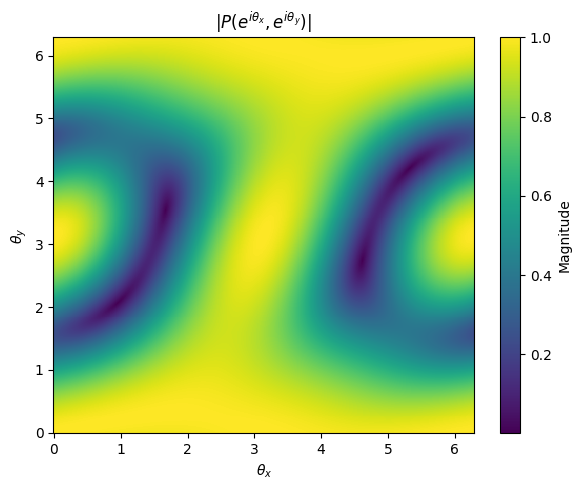

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid of angles
n = 400
theta_x = np.linspace(0, 2*np.pi, n)
theta_y = np.linspace(0, 2*np.pi, n)
ThetaX, ThetaY = np.meshgrid(theta_x, theta_y)

# Map to the complex unit circle
X = np.exp(1j * ThetaX)
Y = np.exp(1j * ThetaY)

# Evaluate |P(x, y)|
Z = np.abs(P(X, Y))

# Plot
plt.figure(figsize=(6,5))
plt.pcolormesh(ThetaX, ThetaY, Z, shading='auto', cmap='viridis')
plt.xlabel(r'$\theta_x$')
plt.ylabel(r'$\theta_y$')
plt.title(r'$|P(e^{i\theta_x}, e^{i\theta_y})|$')
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()

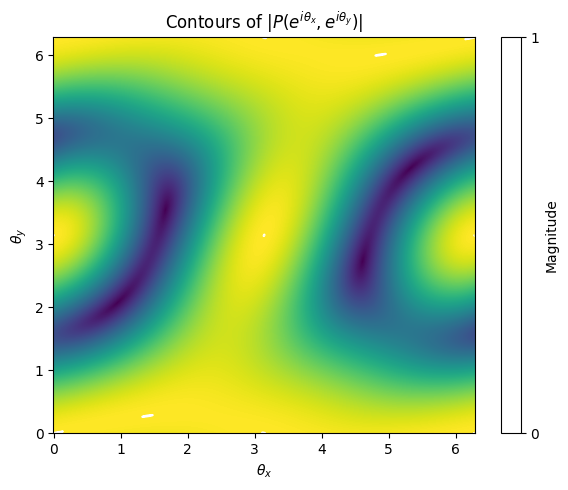

In [6]:
n = 4000
theta_x = np.linspace(0, 2*np.pi, n)
theta_y = np.linspace(0, 2*np.pi, n)
ThetaX, ThetaY = np.meshgrid(theta_x, theta_y)

# Map to unit circle
X = np.exp(1j * ThetaX)
Y = np.exp(1j * ThetaY)

# Compute magnitude
Z = np.abs(P(X, Y))

# Define levels for contours
levels = [0.000001, 0.99999]

# Plot filled background and contours
plt.figure(figsize=(6,5))
plt.pcolormesh(ThetaX, ThetaY, Z, shading='auto', cmap='viridis')
contours = plt.contour(ThetaX, ThetaY, Z, levels=levels, colors='white')
plt.clabel(contours, inline=True, fontsize=8, fmt="%.2f")

plt.xlabel(r'$\theta_x$')
plt.ylabel(r'$\theta_y$')
plt.title(r'Contours of $|P(e^{i\theta_x}, e^{i\theta_y})|$')
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()